<a href="https://colab.research.google.com/github/hyehyuni/essa/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(3)_3%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **[ 미니 프로젝트 (3) ]**
### **8기 3조 - 서혜현, 곽지수, 임정현, 서유진, 이인서**

- 과제 : 미니 프로젝트(1)에 이어서, 한 학기동안 배운 회귀 모델들 중 하나 이상을 해당 데이터에 적합.

- 조건 : 하이퍼 파라미터 튜닝 포함

-  분석 파일을 1) 제출 후 리더보드에서 점수 확인 2) github에 업로드하여 점수와 깃허브 링크를 과제함에 댓글로 달아주시면 됩니다. 점수 고득점자 1위 조원분들께는 우수학회원 점수 가산(1위 조 전원 +3점)이 있을 예정입니다.

- 제출기한 : 2023.6.30 (금) 23:59

- 관련 사이트: https://dacon.io/competitions/open/235536/codeshare

**<변수 소개>**
* title : 영화의 제목
* distributor : 배급사
* genre : 장르
* release_time : 개봉일
* time : 상영시간(분)
* screening_rat : 상영등급
* director : 감독이름
* dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
* dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
* num_staff : 스텝수
* num_actor : 주연배우수
*box_off_num : 관객수


#01. 필요한 모듈 불러오기

In [8]:
# 나눔 폰트 설치 / 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,292 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123069 files and di

In [9]:
import pandas as pdns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') #matplotlib 한글 깨짐 방지
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#02. 데이터 불러오기

In [136]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/esaa/자료/movies/movies_train.csv")
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/esaa/자료/movies/movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/esaa/자료/movies/submission.csv')

# 03. 데이터 분석

1) 데이터 확인

In [137]:

train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [138]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [139]:
# 데이터 형태 확인
print(train.shape)
print(test.shape)

(600, 12)
(243, 11)


In [140]:
# 데이터 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [141]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [142]:
# 데이터의 기술 통계량 확인
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [143]:
# 데이터의 상관계수 확인
pd.reset_option('display.float_format')

In [144]:
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


<Axes: >

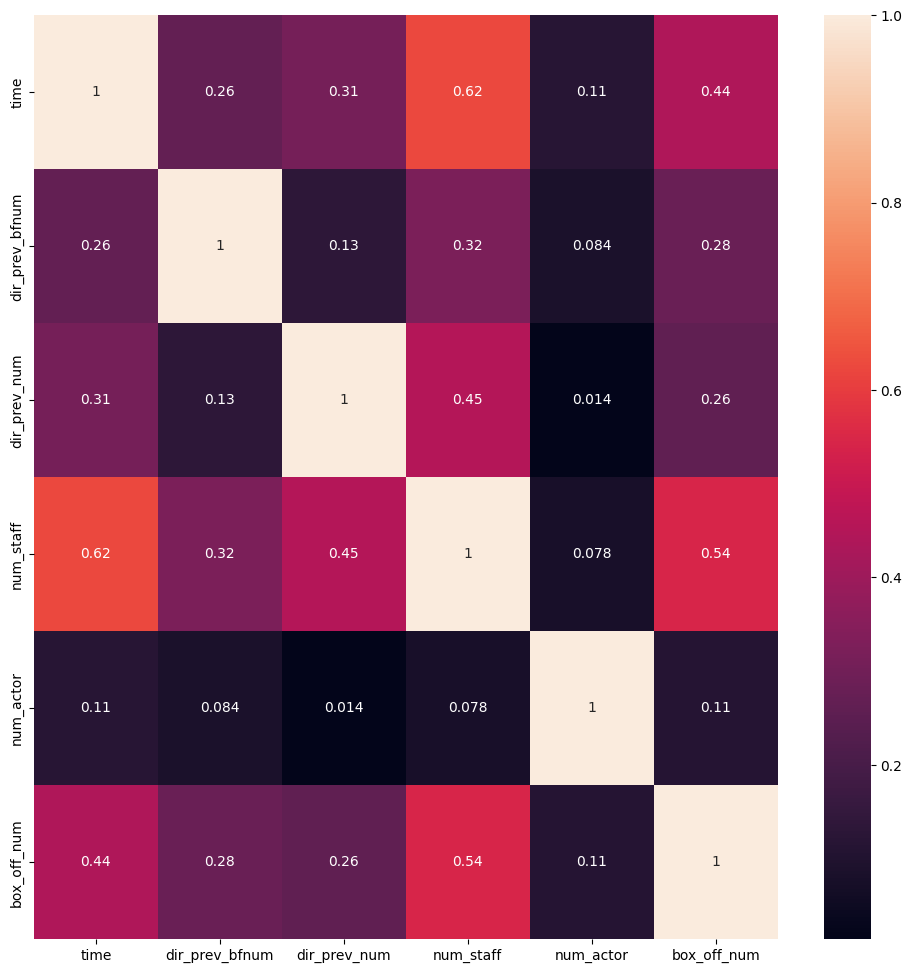

In [145]:
# train의 변수 간 상관관계 확인
plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr(), annot=True)

2) 데이터 전처리

In [146]:
# 결측치 여부 확인
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [147]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

=> dir_prev_bfnum 칼럼에 결측치가 많음을 확인

In [148]:
# dir_prev_bfnum이 nan인 경우 0으로 대체
train['dir_prev_bfnum'].fillna(0, inplace = True)
test['dir_prev_bfnum'].fillna(0, inplace = True)

In [149]:
train.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [150]:
test.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
dtype: int64

In [151]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
distributor_list

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
Name: distributor, dtype: int64

In [152]:
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [153]:
# train data 개봉일을 바탕으로 년,월 변수 생성
train['year'] = train['release_time'].apply(lambda x: int(x[:4]))
train['month'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

In [154]:
train

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,롯데엔터테인먼트,액션,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015,11
2,은밀하게 위대하게,(주)쇼박스,액션,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013,6
3,나는 공무원이다,(주)NEW,코미디,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012,7
4,불량남녀,기타,코미디,108,15세 관람가,신근호,1.00,1,251,2,483387,2010,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091,2014,8
596,파파로티,(주)쇼박스,드라마,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438,2013,3
597,살인의 강,(주)마운틴픽쳐스,공포,99,청소년 관람불가,김대현,0.00,0,123,4,2475,2010,9
598,악의 연대기,CJ 엔터테인먼트,느와르,102,15세 관람가,백운학,0.00,0,431,4,2192525,2015,5


In [155]:
# test data 개봉일을 바탕으로 년,월 변수 생성
test['year'] = test['release_time'].apply(lambda x: int(x[:4]))
test['month'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [156]:
test

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,year,month
0,용서는 없다,기타,느와르,125,청소년 관람불가,김형준,3.005290e+05,2,304,3,2010,1
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,113,12세 관람가,이광재,3.427002e+05,4,275,3,2010,1
2,하모니,CJ 엔터테인먼트,드라마,115,12세 관람가,강대규,4.206611e+06,3,419,7,2010,1
3,의형제,(주)쇼박스,액션,116,15세 관람가,장훈,6.913420e+05,2,408,2,2010,2
4,평행 이론,CJ 엔터테인먼트,공포,110,15세 관람가,권호영,3.173800e+04,1,380,1,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,기타,드라마,78,15세 관람가,안슬기,2.590000e+03,1,4,4,2015,11
239,울보 권투부,기타,다큐멘터리,86,12세 관람가,이일하,0.000000e+00,0,18,2,2015,10
240,어떤살인,기타,느와르,107,청소년 관람불가,안용훈,0.000000e+00,0,224,4,2015,10
241,말하지 못한 비밀,기타,드라마,102,청소년 관람불가,송동윤,5.069900e+04,1,68,7,2015,10


In [157]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
items = train[['genre', 'screening_rat', 'year', 'month']]

for i in items:
 train[i] = le.fit_transform(train[i])

In [158]:
train.head()

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,롯데엔터테인먼트,10,96,3,조병옥,0.00,0,91,2,23398,2,10
1,내부자들,(주)쇼박스,2,130,3,우민호,1161602.50,2,387,3,7072501,5,10
2,은밀하게 위대하게,(주)쇼박스,10,123,1,장철수,220775.25,4,343,4,6959083,3,5
3,나는 공무원이다,(주)NEW,11,101,2,구자홍,23894.00,2,20,6,217866,2,6
4,불량남녀,기타,11,108,1,신근호,1.00,1,251,2,483387,0,10


In [160]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
items = test[['genre', 'screening_rat', 'year', 'month']]

for i in items:
 test[i] = le.fit_transform(test[i])

In [161]:
test.head()

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,year,month
0,용서는 없다,기타,2,125,3,김형준,3.005290e+05,2,304,3,0,0
1,아빠가 여자를 좋아해,(주)쇼박스,5,113,0,이광재,3.427002e+05,4,275,3,0,0
2,하모니,CJ 엔터테인먼트,4,115,0,강대규,4.206611e+06,3,419,7,0,0
3,의형제,(주)쇼박스,10,116,1,장훈,6.913420e+05,2,408,2,0,1
4,평행 이론,CJ 엔터테인먼트,1,110,1,권호영,3.173800e+04,1,380,1,0,1
